# <center> Data Analytics on RMM Pools </center>

## Requirements

In [1]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.pyplot import figure


pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_colwidth', None)

In [2]:
# **NOTES**
# - Implied Spot Price = Spot Price = Reported Price (reported by RMM) 

In [3]:
# matt_data = {"theoreticalValue":1101.6004188774748,"trueValue":1101.6004188774748,"tau":469546,"spotPrice":1107.044922741716},{"theoreticalValue":1139.6769495072242,"trueValue":1116.00124199992,"tau":454388,"spotPrice":1123.1196148443917},{"theoreticalValue":1148.5712326469252,"trueValue":1128.465474499385,"tau":436920,"spotPrice":1137.4058578676634},{"theoreticalValue":1156.2603902072497,"trueValue":1139.7185365062846,"tau":430400,"spotPrice":1150.7040613305842},{"theoreticalValue":1155.7122834547758,"trueValue":1136.7016512145353,"tau":397240,"spotPrice":1146.6506706014761},{"theoreticalValue":1152.7584255737074,"trueValue":1132.3635912404895,"tau":396332,"spotPrice":1141.2429140199167},{"theoreticalValue":1142.7294657088946,"trueValue":1116.8296172715038,"tau":387543,"spotPrice":1122.6355109839553},{"theoreticalValue":1139.2451163507073,"trueValue":1111.3191514010337,"tau":384383,"spotPrice":1116.2624085758343},{"theoreticalValue":1135.2523046332985,"trueValue":1105.1314529807446,"tau":383207,"spotPrice":1109.2405129961894},{"theoreticalValue":1148.7631817634249,"trueValue":1124.7681022618963,"tau":360620,"spotPrice":1130.7565452555718},{"theoreticalValue":1156.546560781905,"trueValue":1137.0232484272865,"tau":360461,"spotPrice":1144.6338208205002},{"theoreticalValue":1163.3342419739365,"trueValue":1147.4157778154672,"tau":358878,"spotPrice":1156.7906607968837},{"theoreticalValue":1159.93847614702,"trueValue":1141.6569159826076,"tau":347114,"spotPrice":1149.433121193915},{"theoreticalValue":1156.584603113163,"trueValue":1136.1229592927502,"tau":339257,"spotPrice":1142.5997802815918},{"theoreticalValue":1152.0152635494676,"trueValue":1129.2434733281752,"tau":338721,"spotPrice":1134.390974645639},{"theoreticalValue":1169.8945227258996,"trueValue":1151.8069515847499,"tau":275490,"spotPrice":1159.866304913038},{"theoreticalValue":1178.1494485971948,"trueValue":1163.6979007873372,"tau":264981,"spotPrice":1173.8467382936599},{"theoreticalValue":1183.8159097596704,"trueValue":1172.1704644401239,"tau":263380,"spotPrice":1184.2513117897213},{"theoreticalValue":1196.1101765774288,"trueValue":1184.7260831018248,"tau":207559,"spotPrice":1200.2828400541619},{"theoreticalValue":1200.0621135549102,"trueValue":1190.3087813873447,"tau":206526,"spotPrice":1207.7372321751852},{"theoreticalValue":1204.2582534922412,"trueValue":1196.0910245267382,"tau":206087,"spotPrice":1215.8236367639054},{"theoreticalValue":1208.6711537628753,"trueValue":1201.2353339483361,"tau":198581,"spotPrice":1223.3704560925607},{"theoreticalValue":1213.5064867147794,"trueValue":1206.4960392557302,"tau":188924,"spotPrice":1231.4675578749539},{"theoreticalValue":1217.1964118854467,"trueValue":1210.9395201050543,"tau":187924,"spotPrice":1238.6824899918797},{"theoreticalValue":1222.7832813296263,"trueValue":1215.4705458540207,"tau":166646,"spotPrice":1246.463061586927},{"theoreticalValue":1226.126573970732,"trueValue":1219.1522307359435,"tau":166160,"spotPrice":1253.174693693386},{"theoreticalValue":1226.2370648324354,"trueValue":1217.5559211274106,"tau":141487,"spotPrice":1249.012758375856},{"theoreticalValue":1220.2064538753393,"trueValue":1212.1049686965237,"tau":139977,"spotPrice":1236.610851972955},{"theoreticalValue":1216.4252499042807,"trueValue":1208.3124548106632,"tau":139409,"spotPrice":1229.0014982310674},{"theoreticalValue":1214.884519087333,"trueValue":1205.1368254050906,"tau":122065,"spotPrice":1222.7710864399185},{"theoreticalValue":1218.9724913576952,"trueValue":1209.979917534516,"tau":116400,"spotPrice":1229.7131701086892},{"theoreticalValue":1224.2134221408937,"trueValue":1214.828559265504,"tau":101399,"spotPrice":1237.03347193425},{"theoreticalValue":1227.4325417596378,"trueValue":1218.4123371115038,"tau":97946,"spotPrice":1242.715851155653},{"theoreticalValue":1227.211917187858,"trueValue":1216.8803881316344,"tau":82851,"spotPrice":1238.8509395240878},{"theoreticalValue":1225.567656797517,"trueValue":1215.3333725152859,"tau":82673,"spotPrice":1235.5423783246654},{"theoreticalValue":1225.6856054526197,"trueValue":1214.591884649872,"tau":73815,"spotPrice":1233.6416979588075},{"theoreticalValue":1237.7484342274888,"trueValue":1219.6085926457044,"tau":16641,"spotPrice":1238.267959564793},{"theoreticalValue":1245.3733151104132,"trueValue":1225.5293478052458,"tau":4397,"spotPrice":1244.8793788562202},{"theoreticalValue":1244.6623093626706,"trueValue":1225.045129385785,"tau":4252,"spotPrice":1243.3226706793098},{"theoreticalValue":1244.0579420327258,"trueValue":1224.5268679077776,"tau":3931,"spotPrice":1241.790045096186},{"theoreticalValue":1242.9419549167978,"trueValue":1223.277917074544,"tau":3810,"spotPrice":1239.4601617630326},{"theoreticalValue":1245.9205207298887,"trueValue":1226.8163140260976,"tau":1705,"spotPrice":1242.5806283069314},{"theoreticalValue":1247.2336414733718,"trueValue":1228.4923925737767,"tau":1056,"spotPrice":1243.9867322102004},{"theoreticalValue":1249.396574677003,"trueValue":1231.467863998248,"tau":491,"spotPrice":1246.8677935331868},{"theoreticalValue":1251.6230690303055,"trueValue":1234.6586632864846,"tau":166,"spotPrice":1250.0273704008955}

In [4]:
# matt_df = pd.DataFrame(matt_data)

In [5]:
# matt_df[['theoreticalValue', 'trueValue', 'spotPrice']].plot.line()

## Pre-Processing

### Get GraphQL Query Data

In [6]:
def run_query(q):
  # Newest Version - https://api.studio.thegraph.com/query/20803/primitive-subgraph/v0.0.2-rc0
    request = requests.post('https://api.studio.thegraph.com/query/24448/primitive-subgraph/v0.1.16/','',json={'query': q})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, q))

In [7]:
# define subgraph query
def swapQuery(first, skip):
    return """
    {
     swaps(first: FIRST,
          skip: SKIP,
    ) { 
          pool {
            id
            createdAtTimestamp
            underlyingToken {decimals}
            quoteToken {decimals}
            liquidity
            strike
            invariant
            sigma
            maturity
            totalUnderlyingTokens
            totalQuoteTokens
            initialQuote
            initialUnderlying
            initialLiquidity
            initialTau
            feesCollectedQuote
            feesCollectedUnderlying
            txCount
          }
            riskyForStable
            deltaIn
            deltaOut
            pool {
              id
            }
            timestamp
            tau
            totalUnderlying
            totalQuote
            totalLiquidity
            transactionHash
     } 

    }
    """.replace("FIRST", str(first)).replace("SKIP", str(skip))

# get rid of totalUnderlyingTokens and totalQuoteTokens?


In [8]:
def get_swaps_query():
    # swaps = run_query(swapQuery(1000,0))['data']['swaps'] + \
    #             run_query(swapQuery(1000,1000))['data']['swaps'] + \
    #             run_query(swapQuery(1000,2000))['data']['swaps'] + \
    #             run_query(swapQuery(1000,3000))['data']['swaps']

    swaps = run_query(swapQuery(1000,0))['data']['swaps']
    data = []
    for s in swaps:
      # print(s)
      # every s is a dictionary json of values,
      data.append(s)
    
    # df = pd.DataFrame(data)
    return(data)

### Clean Dataset, Column type conversions

In [9]:
# get graphQL dict data
swap_dict = get_swaps_query()

# convert dict to df
swap_df_raw = pd.json_normalize(swap_dict)

In [10]:
# Gets raw swap data from whale pool
sample_whale_df = swap_df_raw[swap_df_raw['pool.id'] == '0x0406da38d507a95e0cb6802d023a2932131cf8fd57b12faa82b3bec3307e5241'].sort_values(by=['tau'], ascending=False)

In [11]:
# seperate trade types into two dfs
df_riskForStable = swap_df_raw[swap_df_raw['riskyForStable'] == True]
df_stableForRisk = swap_df_raw[swap_df_raw['riskyForStable'] == False]

In [12]:
# function to convert columns to floats
def colToFloat(df, col_list):
  df = df[col_list].apply(pd.to_numeric, errors='coerce')
  return df

def decimalConv(df, col_list, decimal):
  df[col_list] = df[col_list] / decimal
  return df


In [13]:
# get a list of swap_df_raw columns
col_list = swap_df_raw.columns.tolist()

# remove pool.id, which we don't want to convert to numeric
col_list.remove('pool.id')
col_list.remove('transactionHash')

In [14]:
# eth to usdc swaps 
df_riskStable_converted = colToFloat(df_riskForStable, col_list)
df_riskForStable[col_list] = df_riskStable_converted

# usdc to eth swaps
df_stableRisk_converted = colToFloat(df_stableForRisk, col_list)
df_stableForRisk[col_list] = df_stableRisk_converted


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# Specify columns that need to be converted to either 18 decimals or 6
riskStable_col_dec_18 = ['deltaIn', 'totalUnderlying', 'totalLiquidity', 'pool.liquidity', 'pool.initialLiquidity', 'pool.initialUnderlying', 'pool.feesCollectedUnderlying']
riskStable_col_dec_6 = ['deltaOut', 'totalQuote', 'pool.strike', 'pool.initialQuote', 'pool.feesCollectedQuote']

stableRisk_col_dec_18 = ['deltaOut', 'totalUnderlying', 'totalLiquidity', 'pool.liquidity', 'pool.initialLiquidity', 'pool.initialUnderlying', 'pool.feesCollectedUnderlying']
stableRisk_col_dec_6 = ['deltaIn', 'totalQuote', 'pool.strike', 'pool.initialQuote', 'pool.feesCollectedQuote']

In [16]:
# final df riskForStable
test_18 = decimalConv(df_riskForStable, riskStable_col_dec_18, 1e18)
df_riskForStableFinal = decimalConv(test_18, riskStable_col_dec_6, 1e6)

# final df StableForRisk
test2_18 = decimalConv(df_stableForRisk, stableRisk_col_dec_18, 1e18)
df_stableForRiskFinal = decimalConv(test2_18, stableRisk_col_dec_6, 1e6)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
# Reverse stables swaps deltaOut and deltaIn to get uniform dollar values with riskForStable
df_stableForRiskFinal['deltaOut'] = df_stableForRiskFinal['deltaIn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Merge the previously seperated swap dfs
frames = [df_riskForStableFinal, df_stableForRiskFinal]
swap_df_conv = pd.concat(frames)

In [19]:
# convert to UTC
swap_df_conv['pool.maturity_utc'] = pd.to_datetime(swap_df_conv['pool.maturity'], unit='s').round('D')
swap_df_conv['pool.createdAtTimestamp_utc'] = pd.to_datetime(swap_df_conv['pool.createdAtTimestamp'], unit='s').round('D')
swap_df_conv['timestamp'] = pd.to_datetime(swap_df_conv['pool.maturity'] - swap_df_conv['tau'], unit='s').dt.round('min')
swap_df_conv['pool.initialTau_utc'] = pd.to_datetime(swap_df_conv['pool.maturity'] - swap_df_conv['pool.initialTau'], unit='s').dt.round('min')

# normalize pool sigma value
swap_df_conv['pool.sigma'] = swap_df_conv['pool.sigma'] / 1e4

# convert tau in seconds to tau in years
swap_df_conv['tau_yrs'] = swap_df_conv['tau'] / 31536000
swap_df_conv['pool.initialTau_years'] = swap_df_conv['pool.initialTau'] / 31536000
# sort by 'timestamp'
swap_df_conv = swap_df_conv.sort_values(by=['timestamp'], ascending=False)

In [20]:
# get cumulative swap vol per pool
swap_df_conv['swap_vol_cum'] = swap_df_conv.groupby(['pool.id'])['deltaOut'].cumsum()

# get cumulative swap count per pool
swap_col_count = swap_df_conv.groupby(['pool.id'])['pool.id'].size().to_frame('swap_count_cum').reset_index()

# merge swap_df_conv and swap_count_df 
swap_df_conv = swap_df_conv.merge(swap_col_count, on='pool.id')

# add more informative pool name
swap_df_conv['pool_name'] = swap_df_conv['pool.createdAtTimestamp_utc'].astype(str) + "_" + swap_df_conv['pool.maturity_utc'].astype(str) + "_" + swap_df_conv['pool.strike'].astype(int).astype(str) + "_" + swap_df_conv['pool.sigma'].astype(str)

### RMM-01 Reported Price Feature

In [21]:
import math
from scipy.stats import norm
from scipy.special import ndtri
# from statistics import NormalDist # Need Python 3.8 or greater to run this...

In [22]:
def getSpotPrice(reserveRisky, strike, sigma, tau):
  '''  
    * @param reserveRisky Pool's reserve of risky tokens per unit of liquidity
    * @param strike Price point that defines complete stable token composition of the pool
    * @param sigma Implied volatility of the pool as a decimal percentage
    * @param tau Time until expiry. **CONVERT OUTSIDE OF FUNCTION TO YEARS**
    '''
  spot_price = strike*math.exp(ndtri(1-reserveRisky) * sigma * math.sqrt(tau)) * math.exp((-1/2) * math.pow(sigma,2)*tau)
  # spot_price = strike*math.exp(norm.ppf(1-reserveRisky) * sigma * math.sqrt(tau)) * math.exp((-1/2) * math.pow(sigma,2)*tau)
  return spot_price

In [23]:
# create spot price column
for index,row in swap_df_conv.iterrows():
  # select function inputs
  a =  row['totalUnderlying'] / row['totalLiquidity']
  b = row['pool.strike']
  c = row['pool.sigma']
  d = row['tau_yrs']

  # calculate spot price for risky asset
  spot = getSpotPrice(a,b,c,d)

  # create new row with spot price
  swap_df_conv.loc[index,'spot_price'] = spot

### Compute Custom Features

#### TVL, Pool Duration

In [24]:
# set index to timestamp
swap_df_conv = swap_df_conv.set_index('timestamp')

# invert timestamp index. **This is REQUIRED to calculate 1day rolling volatility correctly.**
swap_df_conv = swap_df_conv.sort_index()

# calculate tvl in USDC
swap_df_conv['tvl'] = (swap_df_conv['totalUnderlying'] * swap_df_conv['spot_price']) + swap_df_conv['totalQuote']

# calculate initial tvl in USDC
swap_df_conv['initial_tvl'] = (swap_df_conv['pool.initialUnderlying'] * swap_df_conv['spot_price']) + swap_df_conv['pool.initialQuote']

# calculate total fees accrued in USDC
swap_df_conv['total_fees_usdc'] = (swap_df_conv['pool.feesCollectedUnderlying'] * swap_df_conv['spot_price']) + swap_df_conv['pool.feesCollectedQuote']

# calculate pool time duration (in datetime)
swap_df_conv['pool.duration_utc'] = swap_df_conv['pool.maturity_utc'] - swap_df_conv['pool.createdAtTimestamp_utc']

# convert pool.duration_utc from datetime to integer
swap_df_conv['pool.duration_utc'] = swap_df_conv['pool.duration_utc'].dt.days.astype('int16')


In [25]:
# drop df columns not being used
swap_df_conv = swap_df_conv.drop(columns=['deltaIn', 'pool.createdAtTimestamp',\
                                          'pool.createdAtTimestamp', 
                                          'transactionHash', 'pool.underlyingToken.decimals', \
                                          'pool.quoteToken.decimals', 'pool.txCount',
                                          'pool.totalQuoteTokens', 'pool.totalUnderlyingTokens'])

## Single Pool Features & Charts

In [26]:
# highlighted pool, expires July 15th
hp_pool = '0xf972527d9ccdb5452acbb7a7b64a2f7c4ced8fcee7ce6c8200874c1a1cd59f52'    # expires 7/15/22
whale_pool = '0x0406da38d507a95e0cb6802d023a2932131cf8fd57b12faa82b3bec3307e5241' # whale pool, expired 7/10/22


# define pnl_df to work on for pnl section
swap_single_pool_df = swap_df_conv[swap_df_conv['pool.id'] == whale_pool]

In [27]:
# get more descriptive single pool name for chart title
single_pool_name = swap_single_pool_df['pool_name'][0]

# calc total swap volume for single pool
print(f"{single_pool_name} pool has had {swap_single_pool_df['deltaOut'].sum()} USDC in cumulative swap volume")

2022-07-05_2022-07-10_1255_0.77 pool has had 1324570.442407 USDC in cumulative swap volume


### Calculate LPT PnL for single pool (Might be able to delete in future major refactor)

In [28]:
# define pnl_df to work on for pnl section
pnl_df = swap_df_conv[swap_df_conv['pool.id'] == whale_pool]

In [29]:
a = pnl_df['pool.initialUnderlying'][0] / pnl_df['pool.initialLiquidity'][0]
b = pnl_df['pool.strike'][0]
c = pnl_df['pool.sigma'][0]
d = pnl_df['pool.initialTau_years'][0]

In [30]:
# calculate initial reference price on single pool initialization
initial_spot = getSpotPrice(a,b,c,d)

In [31]:
initial_spot

1107.0449256644747

In [32]:
# I don't think I need these LPT calculations anymore.
# GET INITIAL LPT
# 1) get proportion of underlying/quote tokens per LPT
pnl_df['initialUnderlyingPerLiquidity'] = pnl_df['pool.initialUnderlying'] / pnl_df['pool.initialLiquidity']
pnl_df['initialQuotePerLiquidity'] = pnl_df['pool.initialQuote'] / pnl_df['pool.initialLiquidity']

# 2) Convert UnderlyingPerLiquidity to USDC via spot price. 
pnl_df['initialUnderlyingPerLiquiditySpot'] = pnl_df['initialUnderlyingPerLiquidity'] * initial_spot

# Add UnderlyingPerLiquidity to QuotePerLiquidity to get LPT value in USDC
pnl_df['initialLPT_usdc'] = pnl_df['initialUnderlyingPerLiquiditySpot'] + pnl_df['initialQuotePerLiquidity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [33]:
# GET CURRENT LPT Column
pnl_df['currentUnderlyingPerLiquidity'] = pnl_df['totalUnderlying'] / pnl_df['totalLiquidity']
# Convert UnderlyingPerLiquidity to USDC
pnl_df['currentUnderlyingPerLiquiditySpot'] = pnl_df['currentUnderlyingPerLiquidity'] * pnl_df['spot_price']
pnl_df['currentQuotePerLiquidity'] = pnl_df['totalQuote'] / pnl_df['totalLiquidity'] # I don't think we need this

# Add UnderlyingPerLiquidity to QuotePerLiquidity to get LPT value in USDC
pnl_df['currentLPT_usdc'] = pnl_df['currentUnderlyingPerLiquiditySpot'] + pnl_df['currentQuotePerLiquidity']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [34]:
# get lpt pct change
pnl_df['lpt_pct_change'] = (pnl_df['currentLPT_usdc'] / pnl_df['initialLPT_usdc'] - 1) * 100

# get spot price pct change
pnl_df['spot_price_pct_change'] = (pnl_df['spot_price'] / initial_spot - 1) * 100

# initial tvl pct change
pnl_df['initial_tvl_pct_change'] = (pnl_df['initial_tvl'] / pnl_df['initial_tvl'][0] - 1) * 100
# tvl pct change
pnl_df['tvl_pct_change'] = (pnl_df['tvl'] / pnl_df['tvl'][0] - 1) * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

#### Calculate Volatility

In [35]:
# Calculate volatility
# pnl_df['real_vol'] = abs((pnl_df['tvl'].rolling(2).apply(lambda x: x[0] - x[-1], raw=True)))/ pnl_df['initial_tvl'][0] * (pnl_df['tau_yrs']).apply(np.sqrt) * 100

# this is calculated by taking the standard deviation of the logarithmic returns times square root of tau
pnl_df['real_vol'] = pnl_df['spot_price'].rolling(2).std() * (pnl_df['tau_yrs']).apply(np.sqrt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


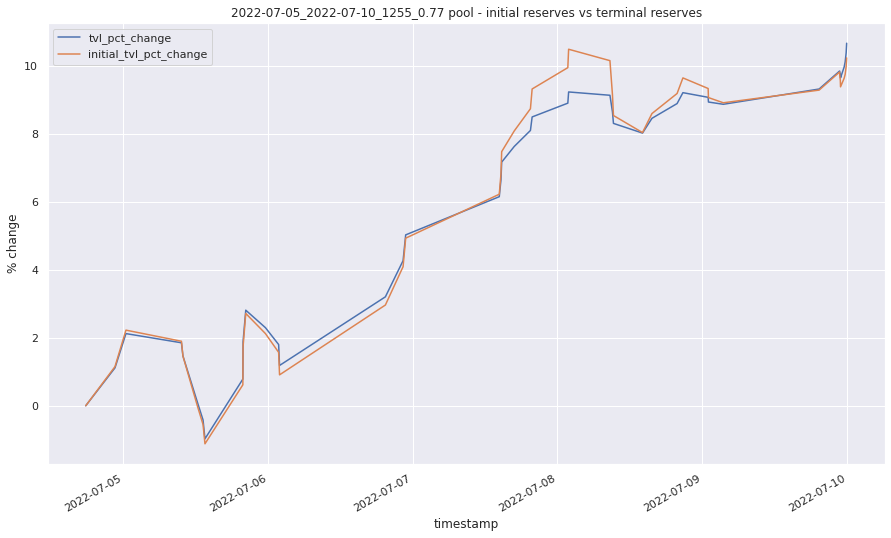

In [36]:
sns.set(rc={'figure.figsize':(15,9)})
pnl_df[['tvl_pct_change', 'initial_tvl_pct_change']].plot.line()
plt.ylabel("% change")
plt.title(single_pool_name + " pool - initial reserves vs terminal reserves")
plt.show();

In [37]:
print(f"Cumulative swap volume of the first half of the period was {pnl_df['deltaOut'][:22].sum()}. \nCumulative swap volume of the second period was {pnl_df['deltaOut'][22:].sum()}.")

Cumulative swap volume of the first half of the period was 541472.976017. 
Cumulative swap volume of the second period was 783097.4663900001.


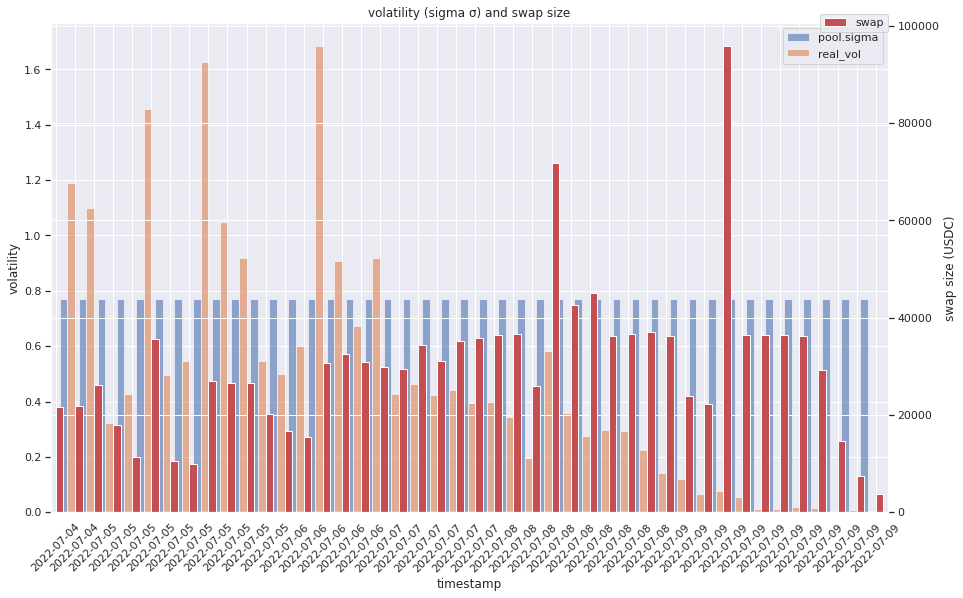

In [38]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

pnl_df[['pool.sigma', 'real_vol']].plot(kind='bar', ax=ax, width=width*2, position=1, alpha=.6)
pnl_df.deltaOut.plot(kind='bar', color='r', ax=ax2, width=width, position=0, label='swap')

ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in pnl_df.index], rotation=45)


plt.title("volatility (sigma σ) and swap size")
ax.set_ylabel('volatility')
ax2.set_ylabel('swap size (USDC)')
plt.xlabel("time")
plt.legend(bbox_to_anchor=(1, 1), loc=5, borderaxespad=0.)
plt.show()

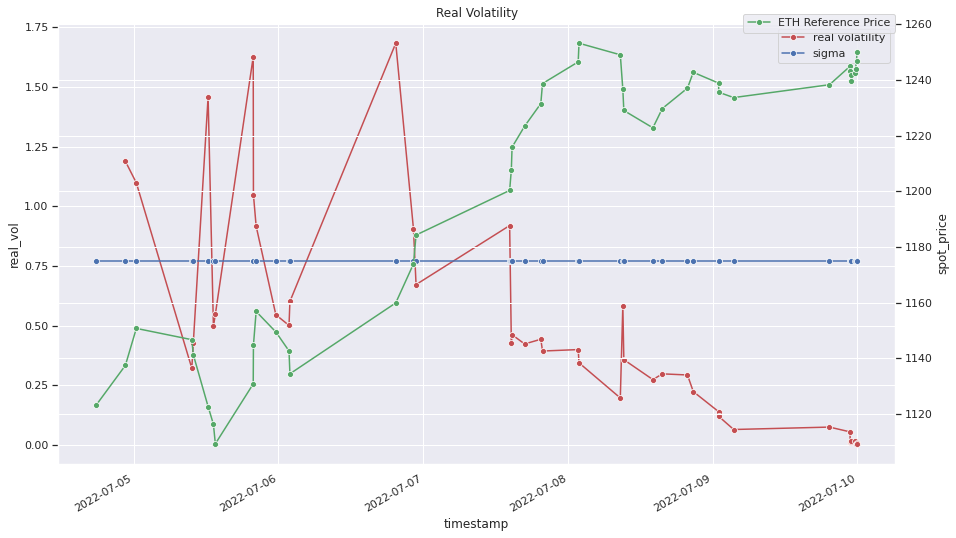

In [39]:
# plot twin axis for token prices
sns.lineplot(data=pnl_df['real_vol'], color="r", marker="o", label="real volatility").get_figure().autofmt_xdate()
sns.lineplot(data=pnl_df['pool.sigma'], color="b", marker="o", label="sigma").get_figure().autofmt_xdate()
ax2 = plt.twinx()
sns.lineplot(data=pnl_df['spot_price'], color="g", marker="o", label="ETH Reference Price", ax=ax2).get_figure().autofmt_xdate()
plt.title('Real Volatility');
plt.legend(bbox_to_anchor=(1, 1), loc=5, borderaxespad=0.)
plt.show();

In [40]:
pnl_df['real_vol'].mean()

0.47955114903088525

In [41]:
pnl_df['real_vol'][0:22].mean()

0.7962004405440701

In [42]:
pnl_df['real_vol'][22:].mean()

0.17729500713193602

#### Dynamic Concentrated Liquidity - Replicating Portfolio Composition Change over Time

In [43]:
# Calculate total underlying reserves in USDC
pnl_df['totalUnderlying_usdc'] = pnl_df['totalUnderlying'] * pnl_df['spot_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# purely for relabeling purposes
pnl_df['totalQuote_usdc'] = pnl_df['totalQuote']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


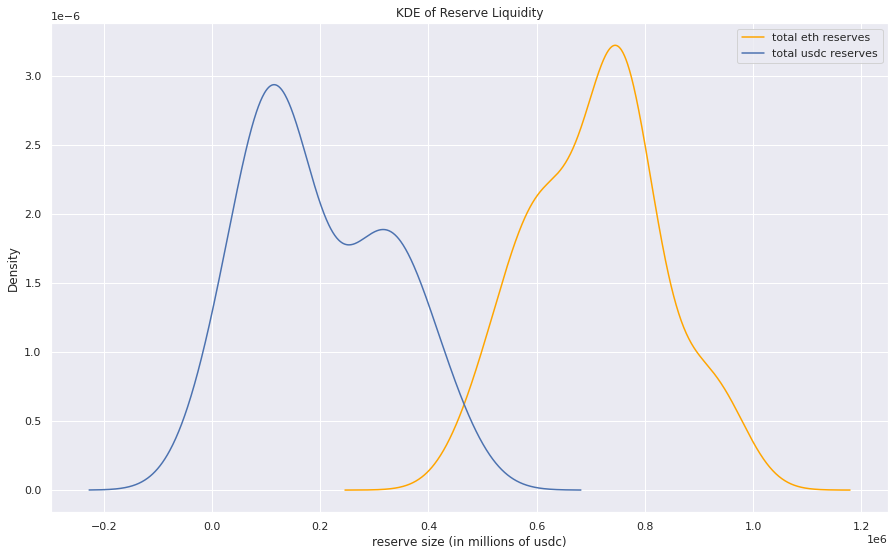

In [45]:
pnl_df['totalUnderlying_usdc'].plot.kde(color='orange', label='total eth reserves',bw_method='silverman')
pnl_df['totalQuote_usdc'].plot.kde(color='b', label='total usdc reserves', bw_method='silverman')

plt.title("KDE of Reserve Liquidity")
plt.xlabel("reserve size (in millions of usdc)")
plt.legend()
plt.show();

In [46]:
eth_to_usdc_df = pnl_df[pnl_df['riskyForStable'] == True]
usdc_to_eth_df = pnl_df[pnl_df['riskyForStable'] == False]

In [47]:
print(f" eth to usdc swap count: {len(eth_to_usdc_df)}. usdc to eth swap count: {len(usdc_to_eth_df)}")

 eth to usdc swap count: 24. usdc to eth swap count: 20


In [50]:
eth_to_usdc_df['liq_efficiency'] = eth_to_usdc_df['deltaOut'] / eth_to_usdc_df['totalUnderlying_usdc']
usdc_to_eth_df['liq_efficiency'] = usdc_to_eth_df['deltaOut'] / usdc_to_eth_df['totalQuote_usdc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


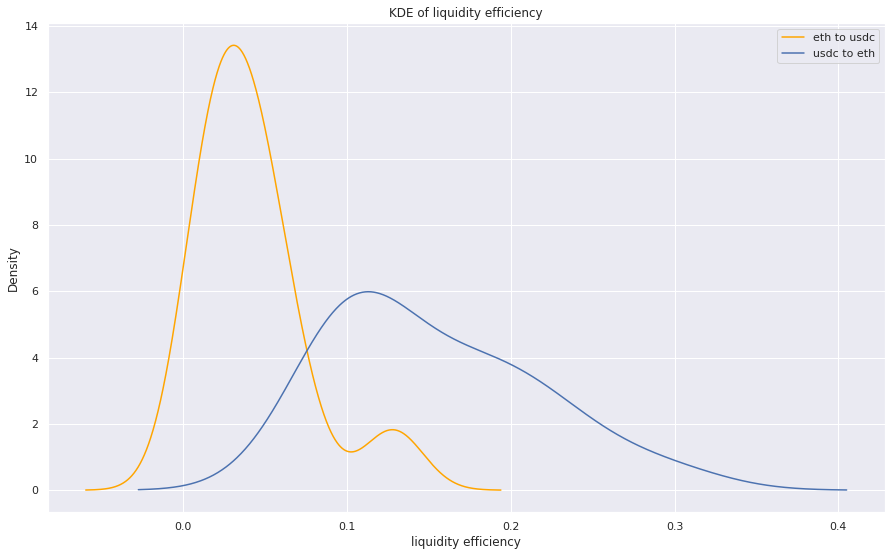

In [52]:
# how concentrated was the liquidity for swaps?
eth_to_usdc_df['liq_efficiency'].plot.kde(color='orange', label='eth to usdc',bw_method='silverman')
usdc_to_eth_df['liq_efficiency'].plot.kde(color='b', label='usdc to eth', bw_method='silverman')
plt.title("KDE of liquidity efficiency")
plt.xlabel("liquidity efficiency")
plt.legend()
plt.show();

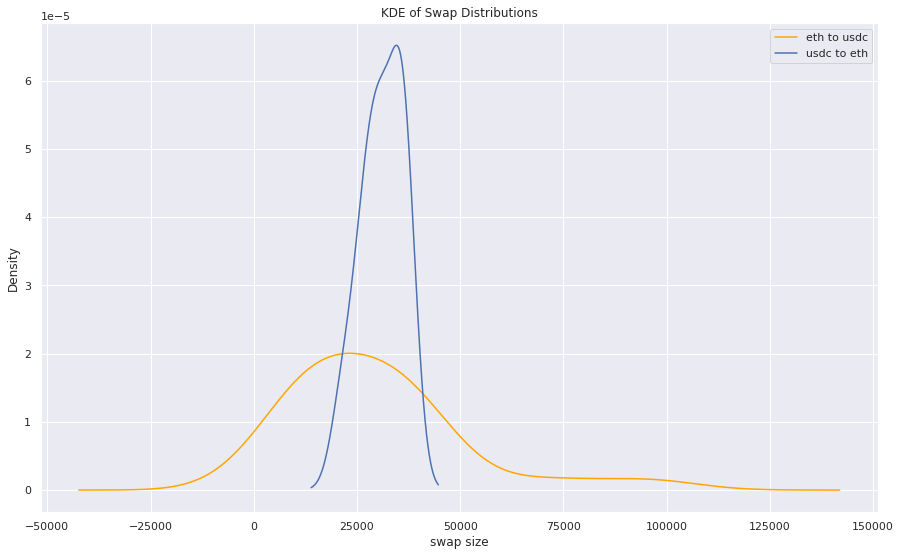

In [53]:
# build density histograms to visualize liquidity
eth_to_usdc_df['deltaOut'].plot.kde(color='orange', label='eth to usdc',bw_method='silverman')
usdc_to_eth_df['deltaOut'].plot.kde(color='b', label='usdc to eth', bw_method='silverman')
plt.title("KDE of Swap Distributions")
plt.xlabel("swap size")
plt.legend()
plt.show();

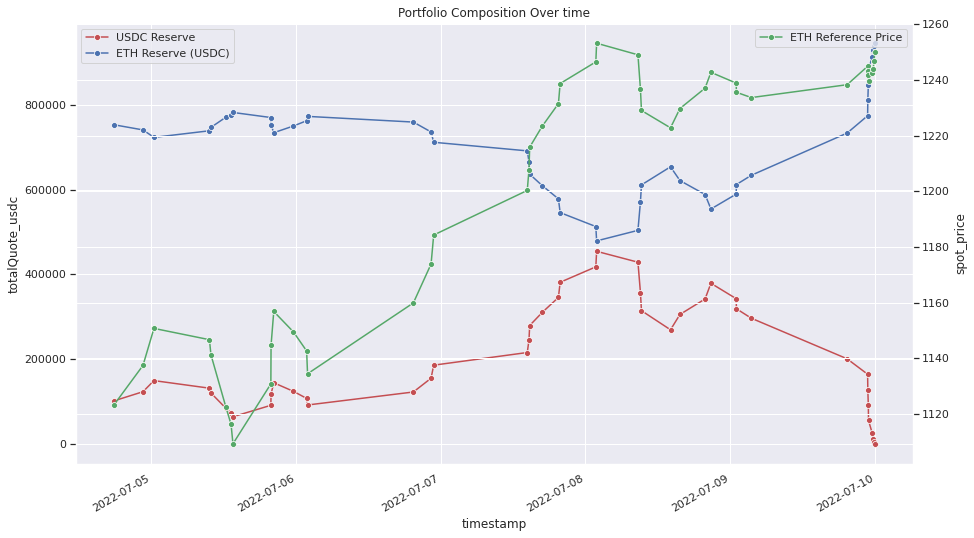

In [57]:
# plot twin axis for token prices
sns.lineplot(data=pnl_df['totalQuote_usdc'], color="r", marker="o", label="USDC Reserve").get_figure().autofmt_xdate()
sns.lineplot(data=pnl_df['totalUnderlying_usdc'], color="b", marker="o", label="ETH Reserve (USDC)").get_figure().autofmt_xdate()
ax2 = plt.twinx()
sns.lineplot(data=pnl_df['spot_price'], color="g", marker="o", label="ETH Reference Price", ax=ax2).get_figure().autofmt_xdate()
plt.title('Portfolio Composition Over time');
plt.show();

### Option Greeks

In [58]:
# delta = option value / spot price
pnl_df['delta_greek'] = 1 - (pnl_df['totalUnderlying'] / pnl_df['totalLiquidity'])

# theta = option value / time to expiry (is that tau? Looks like it per paper)
# STOP HERE - WHAT IS RIGHT UNIT TO CALCULATE THETA DECAY? MAYBE CHECK WHITEPAPER?
pnl_df['theta_greek'] = (pnl_df['tvl'].rolling(2).apply(lambda x: x[0] - x[-1], raw=True) / pnl_df['tvl']) / pnl_df['tau_yrs']

# gamma = measures rate of change of delta so its second derivative.
pnl_df['gamma_greek'] = pnl_df['delta_greek'].rolling(2).apply(lambda x: x[0]-x[-1], raw=True)

# option value / implied volatility (sigma)
pnl_df['vega_greek'] = (pnl_df['tvl'].rolling(2).apply(lambda x: x[0] - x[-1], raw=True) / pnl_df['tvl']) / pnl_df['pool.sigma']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [59]:
greek_col_name = 'vega_greek'

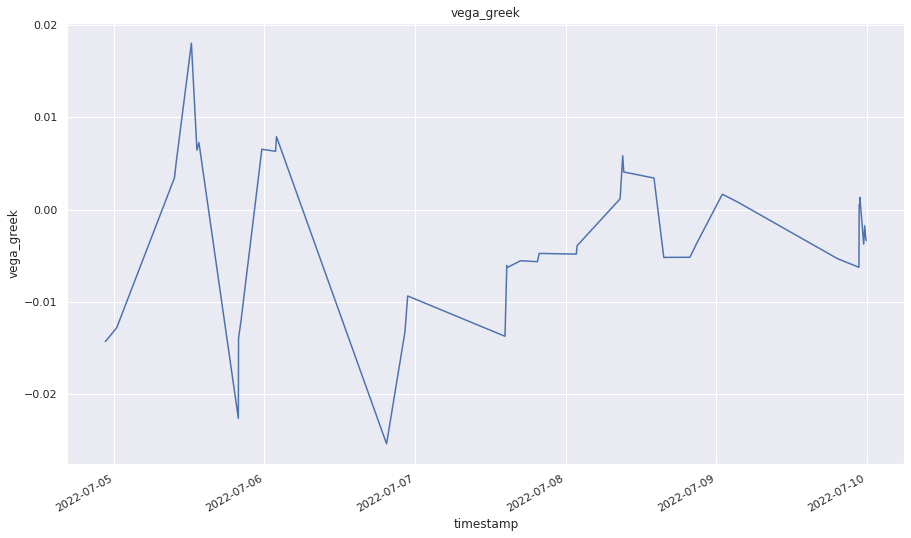

In [60]:
# I think gamma, vega, and rho are all wrong. should be decimals I think
pnl_df[greek_col_name].plot.line()
plt.ylabel(greek_col_name)
plt.title(greek_col_name)
plt.show();

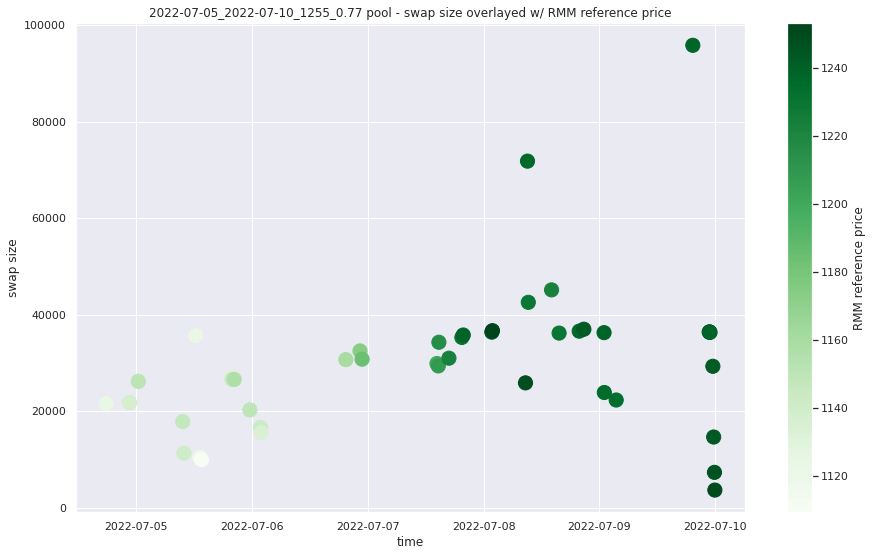

In [61]:
sns.set(rc={'figure.figsize':(15,9)})
plt.scatter(pnl_df.index, pnl_df.deltaOut, s=200, c=pnl_df.spot_price, cmap='Greens')
# plt.legend()
plt.colorbar().set_label('RMM reference price')
plt.title(single_pool_name + " pool - swap size overlayed w/ RMM reference price")
plt.xlabel("time")
plt.ylabel("swap size")
plt.show();

In [62]:
# 7/22/22 NOTE - THIS IS A HACK JOB TO GET INITIAL LPT VALUES ADDED TO DATAFRAME. ITS UGLY AND NEEDS REFACTORING.
              #- ITS ONLY NEEDED TO ACCURATELY CALCULATE PnL.
#get row values for initial spot price and initial LPT
initial_lpt = pnl_df['initialLPT_usdc'][0]
initial_spot = initial_spot
initial_tau = pd.to_datetime(pnl_df['pool.maturity'][0] - pnl_df['pool.initialTau'][0], unit='s').round('min')

# convert dataframe columns to list
currentLPT_usdc_vals = pnl_df['currentLPT_usdc'].tolist()
spot_price_vals = pnl_df['spot_price'].tolist()
timestamp_index = pnl_df.index.tolist()

# add values to beginning of list
currentLPT_usdc_vals.insert(0, initial_lpt)
spot_price_vals.insert(0, initial_spot)
timestamp_index.insert(0, initial_tau)

In [63]:
# convert list back to df. **pnl_graph_df has smaller number of features, specifically adds in initial LPT / spot price to calculate PnL**
pnl_graph_df = pd.DataFrame({"timestamp": timestamp_index, "currentLPT_usdc": currentLPT_usdc_vals, "spot_price": spot_price_vals})

# set index to timestamp
pnl_graph_df = pnl_graph_df.set_index('timestamp')

# get percent changes starting at initial values
pnl_graph_df['spot_price_pct_change'] = (pnl_graph_df['spot_price'] / pnl_graph_df['spot_price'][0] - 1) * 100
pnl_graph_df['lpt_pct_change'] = (pnl_graph_df['currentLPT_usdc'] / pnl_graph_df['currentLPT_usdc'][0] - 1) * 100

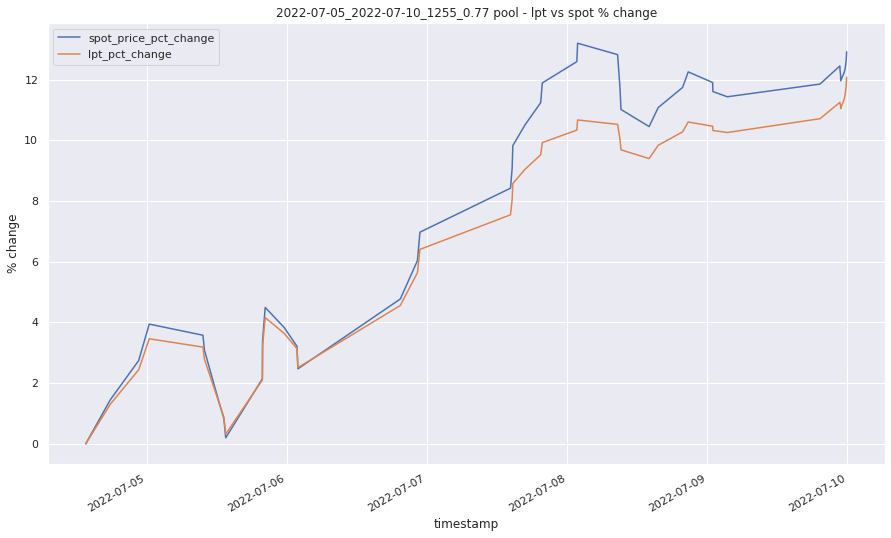

In [64]:
sns.set(rc={'figure.figsize':(15,9)})
pnl_graph_df[['spot_price_pct_change', 'lpt_pct_change']].plot.line()
plt.ylabel("% change")
plt.title(single_pool_name + " pool - lpt vs spot % change")
plt.show();

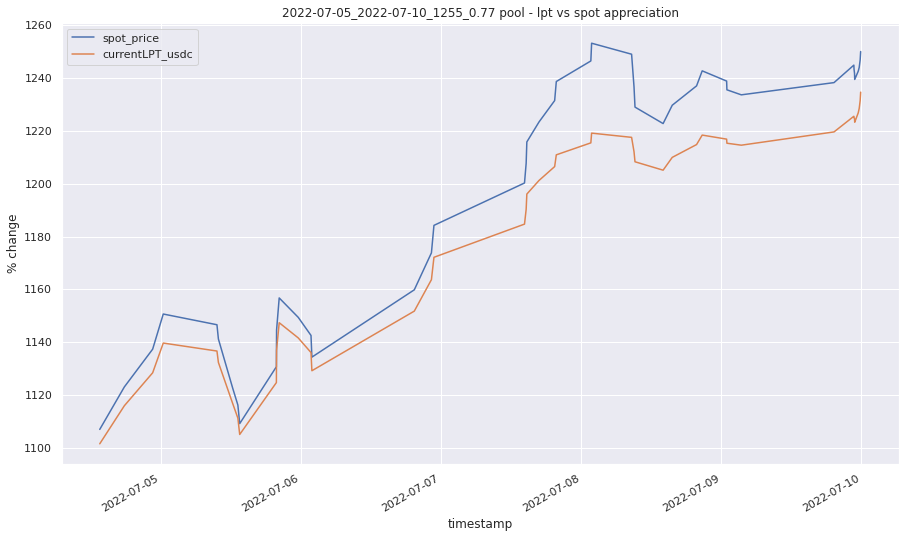

In [65]:
sns.set(rc={'figure.figsize':(15,9)})
pnl_graph_df[['spot_price', 'currentLPT_usdc']].plot.line()
plt.ylabel("% change")
plt.title(single_pool_name + " pool - lpt vs spot appreciation")
plt.show();

# Cumulative Pool Stats

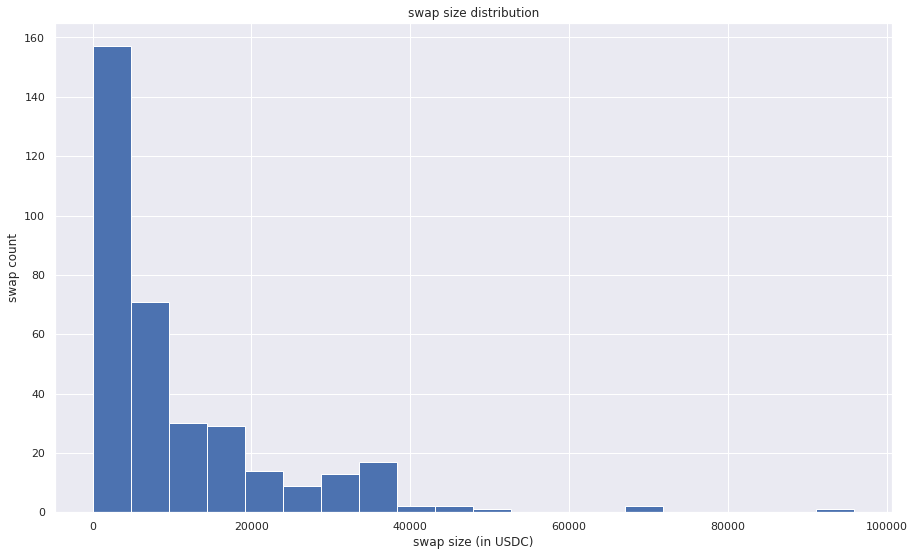

In [66]:
sns.set(rc={'figure.figsize':(15,9)})
swap_df_conv['deltaOut'].hist(bins=20)
plt.ylabel("swap count")
plt.xlabel("swap size (in USDC)")
plt.title("swap size distribution")
plt.show();

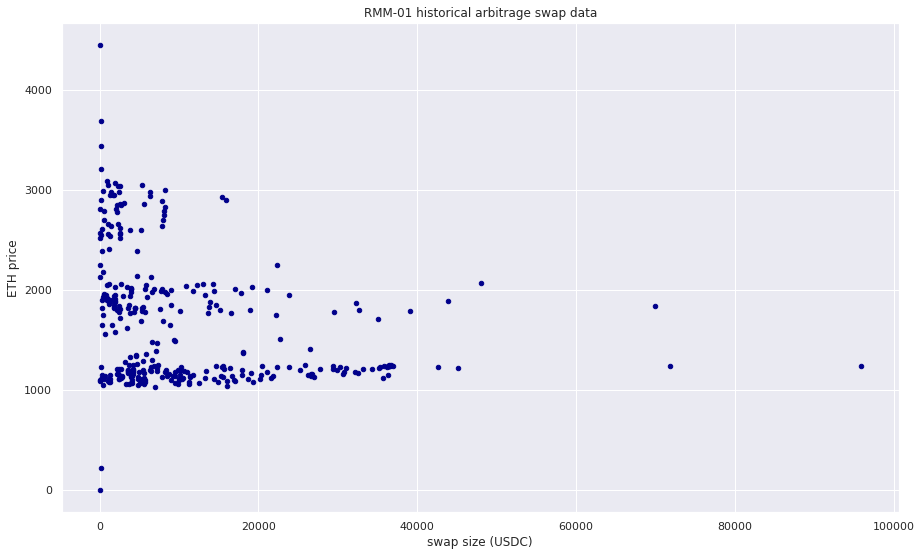

In [67]:
sns.set(rc={'figure.figsize':(15,9)})
swap_df_conv.plot.scatter(x='deltaOut', y='spot_price', c='DarkBlue')
plt.title("RMM-01 historical arbitrage swap data")
plt.xlabel("swap size (USDC)")
plt.ylabel("ETH price")
plt.show();

In [68]:
# 7/4/22 TODO - make a 3d scatterplot of features
# https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-matplotlib

In [69]:
# cumulative swap volume
total_swap_vol = swap_df_conv['deltaOut'].sum()
print(f"Total Cumulative Swap Volume is {total_swap_vol} USDC.")

Total Cumulative Swap Volume is 3681273.228279 USDC.


### Aggregated Pool Level Swap Stats

In [70]:
# total swap per pool
total_swap_vol_pool_df = swap_df_conv['deltaOut'].groupby(swap_df_conv['pool.id']).sum()

# create series that counts all the unique values of the longest unique-valued column, which is pool.id
swap_count_df = swap_df_conv[['pool.id', 'pool.maturity_utc', 'pool.strike', 'pool.sigma']].value_counts()

In [71]:
# convert series to df
swap_count_df = swap_count_df.to_frame()
total_swap_vol_pool_df = total_swap_vol_pool_df.to_frame()

# rename count column for clarity
swap_count_df = swap_count_df.rename(columns={0: "swap_count"})
total_swap_vol_pool_df = total_swap_vol_pool_df.rename(columns={"deltaOut": "total_swap_vol"})
# reset index bc the series created a multi-index series
swap_count_df = swap_count_df.reset_index()
total_swap_vol_pool_df = total_swap_vol_pool_df.reset_index()


In [72]:
# combine swap_count_df and total together based on pool.id
merged_swap_df = pd.merge(swap_count_df, total_swap_vol_pool_df, on='pool.id')

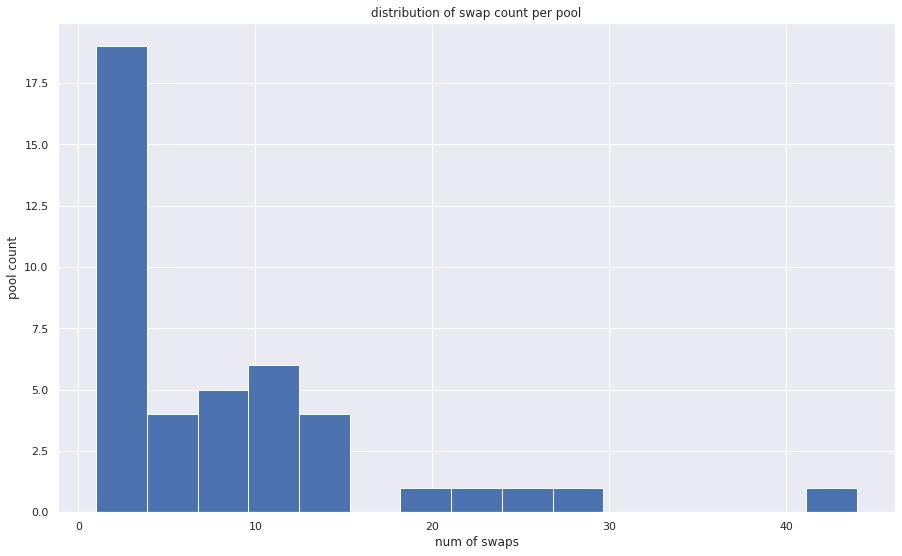

In [73]:
sns.set(rc={'figure.figsize':(15,9)})
merged_swap_df['swap_count'].hist(bins=15)
plt.ylabel("pool count")
plt.xlabel("num of swaps")
plt.title("distribution of swap count per pool")
plt.show();